# NLP Workshop - Getting Started

Welcome to the NLP Workshop! This notebook will guide you through basic NLP concepts and techniques.

## Workshop Overview:
- **Text Processing** with NLTK
- **Speech Recognition** with Vosk
- **Basic NLP Tasks** (Tokenization, POS Tagging, Named Entity Recognition)
- **Sentiment Analysis** with VADER
- **Text Classification** with Scikit-learn

## Prerequisites:
- Run `setup_nltk.py` to download required data
- Activate virtual environment: `source nlp_env/bin/activate`
- Install dependencies: `pip install -r requirements.txt`

In [13]:
# Import necessary libraries
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"NLTK version: {nltk.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
NLTK version: 3.9.1
NumPy version: 2.1.3


## 1. Basic Text Processing

Let's start with basic text processing techniques using NLTK.

In [14]:
# Sample text for processing
sample_text = """
Natural Language Processing (NLP) is a subfield of artificial intelligence that focuses on the interaction between computers and humans through natural language. The ultimate goal of NLP is to read, decipher, understand, and make sense of human language in a manner that is valuable.
"""

print("Original Text:")
print(sample_text.strip())
print("\n" + "="*50 + "\n")

# Sentence Tokenization
sentences = sent_tokenize(sample_text.strip())
print(f"Number of sentences: {len(sentences)}")
for i, sentence in enumerate(sentences, 1):
    print(f"Sentence {i}: {sentence}")

print("\n" + "="*50 + "\n")

# Word Tokenization
words = word_tokenize(sample_text.strip())
print(f"Number of words: {len(words)}")
print(f"First 20 words: {words[:20]}")

Original Text:
Natural Language Processing (NLP) is a subfield of artificial intelligence that focuses on the interaction between computers and humans through natural language. The ultimate goal of NLP is to read, decipher, understand, and make sense of human language in a manner that is valuable.


Number of sentences: 2
Sentence 1: Natural Language Processing (NLP) is a subfield of artificial intelligence that focuses on the interaction between computers and humans through natural language.
Sentence 2: The ultimate goal of NLP is to read, decipher, understand, and make sense of human language in a manner that is valuable.


Number of words: 51
First 20 words: ['Natural', 'Language', 'Processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'artificial', 'intelligence', 'that', 'focuses', 'on', 'the', 'interaction', 'between', 'computers', 'and']


## 2. Stop Words Removal

Stop words are common words that don't add much meaning to the text (e.g., 'the', 'a', 'an', 'in').

In [15]:
# Get English stop words
stop_words = set(stopwords.words('english'))
print(f"Number of stop words: {len(stop_words)}")
print(f"Sample stop words: {list(stop_words)[:20]}")

# Remove stop words from our text
filtered_words = [word for word in words if word.lower() not in stop_words and word.isalnum()]
print(f"\nOriginal word count: {len(words)}")
print(f"Filtered word count: {len(filtered_words)}")
print(f"Filtered words: {filtered_words[:20]}")

Number of stop words: 198
Sample stop words: ['why', "wouldn't", 'yourselves', 'are', 'i', "mightn't", 'didn', 'some', 'other', "we'll", 'in', "he'll", 'whom', 'if', 'its', 's', "she'd", 'with', 'yourself', 'where']

Original word count: 51
Filtered word count: 25
Filtered words: ['Natural', 'Language', 'Processing', 'NLP', 'subfield', 'artificial', 'intelligence', 'focuses', 'interaction', 'computers', 'humans', 'natural', 'language', 'ultimate', 'goal', 'NLP', 'read', 'decipher', 'understand', 'make']


## 3. Stemming and Lemmatization

Stemming reduces words to their root form, while lemmatization considers the context and converts words to their base form.

In [16]:
# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Sample words for demonstration
sample_words = ['running', 'flies', 'cats', 'trouble', 'troubling', 'troubled', 'having', 'had', 'was']

print("Word\t\tStemmed\t\tLemmatized")
print("-" * 40)
for word in sample_words:
    stemmed = stemmer.stem(word)
    lemmatized = lemmatizer.lemmatize(word)
    print(f"{word}\t\t{stemmed}\t\t{lemmatized}")

Word		Stemmed		Lemmatized
----------------------------------------
running		run		running
flies		fli		fly
cats		cat		cat
trouble		troubl		trouble
troubling		troubl		troubling
troubled		troubl		troubled
having		have		having
had		had		had
was		wa		wa


## 4. Part-of-Speech (POS) Tagging

POS tagging identifies the grammatical group of each word (noun, verb, adjective, etc.).

In [17]:
# POS tagging on our sample text
pos_tags = nltk.pos_tag(words[:20])  # First 20 words for demonstration

print("Word\t\tPOS Tag\t\tDescription")
print("-" * 40)
for word, tag in pos_tags:
    print(f"{word}\t\t{tag}\t\t\t{nltk.help.upenn_tagset(tag)}")

Word		POS Tag		Description
----------------------------------------
JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...
Natural		JJ			None
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
Language		NNP			None
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
Processing		NNP			None
(: opening parenthesis
    ( [ {
(		(			None
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Sha

## 5. Sentiment Analysis with VADER

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a sentiment analysis tool specifically attuned to sentiments expressed in social media.

In [19]:
# Import the SentimentIntensityAnalyzer from nltk.sentiment
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Sample texts for sentiment analysis
sample_texts = [
    "I love this amazing product! It's fantastic and works perfectly.",
    "This is terrible. I hate it so much. Worst purchase ever!",
    "The weather is okay today. Not great, not bad.",
    "I'm so excited about the new features! This is revolutionary."
]

print("Text\t\t\t\t\tCompound Score\tSentiment")
print("-" * 70)
for text in sample_texts:
    scores = sia.polarity_scores(text)
    compound = scores['compound']
    sentiment = "Positive" if compound >= 0.05 else "Negative" if compound <= -0.05 else "Neutral"
    print(f"{text[:30]}...\t{compound:.3f}\t\t{sentiment}")

Text					Compound Score	Sentiment
----------------------------------------------------------------------
I love this amazing product! I...	0.952		Positive
This is terrible. I hate it so...	-0.909		Negative
The weather is okay today. Not...	-0.581		Negative
I'm so excited about the new f...	0.456		Positive


## 6. Named Entity Recognition (NER)

NER identifies named entities like persons, organizations, locations, etc.

In [20]:
# Sample text for NER
ner_text = """
google.com Inc. was founded by Steve Jobs, Steve Wozniak, and Ronald Wayne in Cupertino, California on April 1, 1976.
The company is headquartered in Cupertino and designs, develops, and sells consumer electronics.
"""

# Tokenize and POS tag
tokens = word_tokenize(ner_text)
pos_tags = nltk.pos_tag(tokens)

# Named Entity Recognition
named_entities = nltk.ne_chunk(pos_tags)

print("Named Entities Found:")
print("-" * 30)
for chunk in named_entities:
    if hasattr(chunk, 'label'):
        entity_name = ' '.join(c[0] for c in chunk)
        entity_type = chunk.label()
        print(f"{entity_name} -> {entity_type}")

Named Entities Found:
------------------------------
google.com Inc. -> ORGANIZATION
Steve Jobs -> PERSON
Steve Wozniak -> PERSON
Ronald Wayne -> PERSON
Cupertino -> GPE
California -> GPE
Cupertino -> GPE


## 7. Word Frequency Analysis

Let's analyze word frequencies in our text.

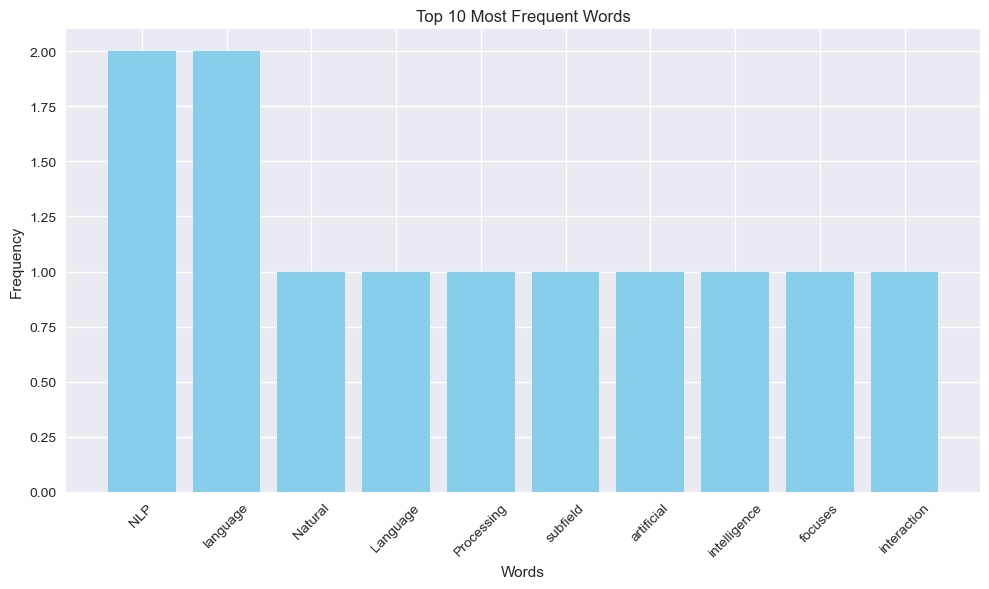


Word Frequency Table:
Word		Frequency
-------------------------
NLP		2
language		2
Natural		1
Language		1
Processing		1
subfield		1
artificial		1
intelligence		1
focuses		1
interaction		1


In [21]:
from collections import Counter

# Calculate word frequencies
word_freq = Counter(filtered_words)
most_common = word_freq.most_common(10)

# Create a bar plot
words, frequencies = zip(*most_common)
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nWord Frequency Table:")
print("Word\t\tFrequency")
print("-" * 25)
for word, freq in most_common:
    print(f"{word}\t\t{freq}")

## 8. Speech Recognition Test

Test the speech recognition functionality (requires microphone).

In [1]:
import os
import sys

try:
    import pyaudio
    from vosk import Model, KaldiRecognizer
    print("Successfully imported vosk and pyaudio!")
except ImportError as e:
    print(f"Import error: {e}")
    print("Please install pyaudio: pip install pyaudio")
    print("You may need to install PortAudio first: brew install portaudio")
    print("Please install vosk: pip install vosk")
    # Instead of exiting, we'll continue but set a flag
    libraries_available = False
else:
    libraries_available = True

MODEL_PATH = "/Users/ammar/Desktop/NLP_Workshop/models/vosk/vosk-model-en-us-0.22"
if not os.path.exists(MODEL_PATH):
    print("Please download the Vosk model from https://alphacephei.com/vosk/models")
elif libraries_available:  # Only show "ready" message if libraries are available
    print("Speech recognition model found. Ready to test!")
    print("Run 'python test_speech.py' in your terminal to test speech recognition.")
else:
    print("Please install the required libraries before continuing.")

Import error: No module named 'pyaudio'
Please install pyaudio: pip install pyaudio
You may need to install PortAudio first: brew install portaudio
Please install vosk: pip install vosk
Please install the required libraries before continuing.


## 9. Text Vectorization Techniques

### Bag of Words with CountVectorizer

In [10]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
import pandas as pd
corpus = [
    "I love natural language processing",
    "Language processing is fun",
    "I love machine learning and NLP"
]
#bag of words
cv=CountVectorizer()
X_bow = cv.fit_transform(corpus)
print("===Bag of words===")
print(pd.DataFrame(X_bow.toarray() , columns=cv.get_feature_names_out()))

===Bag of words===
   and  fun  is  language  learning  love  machine  natural  nlp  processing
0    0    0   0         1         0     1        0        1    0           1
1    0    1   1         1         0     0        0        0    0           1
2    1    0   0         0         1     1        1        0    1           0


In [11]:
from sklearn.feature_extraction.text import  CountVectorizer,TfidfVectorizer
import pandas as pd
corpus =[
    "I love natural language processing",
    "language processing is fun",
    "i love machine learning and NLP"
]
cv = CountVectorizer()
X_bow = cv.fit_transform(corpus)
print("=== Bag of words ===")
print(pd.DataFrame(X_bow.toarray(), columns =cv.get_feature_names_out()))
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(corpus)
print("\n=== TF-IDF ===")
print(pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out()))
cv_ngram = CountVectorizer(ngram_range=(1,2))
X_ngram = cv_ngram.fit_transform(corpus)
print("\n=== N-grams (Unigrams + Bigrams) ===")
print(pd.DataFrame(X_ngram.toarray(), columns=cv_ngram.get_feature_names_out()))
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

=== Bag of words ===
   and  fun  is  language  learning  love  machine  natural  nlp  processing
0    0    0   0         1         0     1        0        1    0           1
1    0    1   1         1         0     0        0        0    0           1
2    1    0   0         0         1     1        1        0    1           0

=== TF-IDF ===
        and       fun        is  language  learning      love   machine  \
0  0.000000  0.000000  0.000000  0.459854  0.000000  0.459854  0.000000   
1  0.000000  0.562829  0.562829  0.428046  0.000000  0.000000  0.000000   
2  0.467351  0.000000  0.000000  0.000000  0.467351  0.355432  0.467351   

    natural       nlp  processing  
0  0.604652  0.000000    0.459854  
1  0.000000  0.000000    0.428046  
2  0.000000  0.467351    0.000000  

=== N-grams (Unigrams + Bigrams) ===
   and  and nlp  fun  is  is fun  language  language processing  learning  \
0    0        0    0   0       0         1                    1         0   
1    0        0   

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Sample documents
documents = [
    "Natural language processing is fun",
    "Machine learning helps computers learn",
    "NLP and ML are related fields",
    "Text processing involves tokenization"
]

# Create CountVectorizer for Bag of Words
vectorizer = CountVectorizer()
# Fit and transform
X = vectorizer.fit_transform(documents)
# Get feature names
feature_names = vectorizer.get_feature_names_out()
# Convert to DataFrame
df_bow = pd.DataFrame(X.toarray(), columns=feature_names)
print("Bag of Words Representation:")
df_bow

Bag of Words Representation:


,and,are,computers,fields,fun,helps,involves,is,language,learn,learning,machine,ml,natural,nlp,processing,related,text,tokenization
0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0
1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0
2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1


### TF-IDF Vectorization

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
# Fit and transform
X_tfidf = tfidf_vectorizer.fit_transform(documents)
# Get feature names
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
# Convert to DataFrame
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_feature_names)
print("TF-IDF Representation:")
df_tfidf

TF-IDF Representation:


,and,are,computers,fields,fun,helps,involves,is,language,learn,learning,machine,ml,natural,nlp,processing,related,text,tokenization
0,0.000000,0.000000,0.000000,0.000000,0.465162,0.000000,0.000000,0.465162,0.465162,0.000000,0.000000,0.000000,0.000000,0.465162,0.000000,0.366739,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.447214,0.000000,0.000000,0.447214,0.000000,0.000000,0.000000,0.447214,0.447214,0.447214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.408248,0.408248,0.000000,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,0.408248,0.000000,0.408248,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.525473,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.414289,0.000000,0.525473,0.525473


### Count Vectorizer

In [13]:
# Count Vectorizer is the same as Bag of Words
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(documents)
count_feature_names = count_vectorizer.get_feature_names_out()
df_count = pd.DataFrame(X_count.toarray(), columns=count_feature_names)
print("Count Vectorizer Representation:")
df_count

Count Vectorizer Representation:


,and,are,computers,fields,fun,helps,involves,is,language,learn,learning,machine,ml,natural,nlp,processing,related,text,tokenization
0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0
1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0
2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1


## 10. Text Classification with Multinomial Naive Bayes

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews
import random
import string
from nltk.corpus import stopwords

# Get movie reviews data
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

# Extract texts and labels
texts = [' '.join(words) for words, category in documents]
labels = [1 if category == 'pos' else 0 for words, category in documents]

# Preprocessing: case fold to lowercase
texts = [text.lower() for text in texts]

# Remove punctuation marks
texts = [''.join(c for c in text if c not in string.punctuation) for text in texts]

# Remove stop words
stop_words = set(stopwords.words('english'))
texts = [' '.join(word for word in text.split() if word not in stop_words) for text in texts]

# Vectorize
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)
y = labels

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Test Set: {accuracy:.2f}")


[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/ammar/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


Model Accuracy on Test Set: 0.83


In [ ]:
def preprocess_text(text):
    # Basic preprocessing: lowercase strip extra spaces
    return text.strip().lower()

def predict_sentiment(sentence, vectorizer, model):
    sentence_processed = preprocess_text(sentence)
    sentence_vectorized = vectorizer.transform([sentence_processed])
    prediction = model.predict(sentence_vectorized)
    return "Positive" if prediction[0] == 1 else "Negative"

# Assuming vectorizer and model are already loaded correctly

while True:
    user_sentence = input("Enter a sentence (or type 'exit' to quit): ")
    if user_sentence.lower() == 'exit':
        print("Exiting...")
        break
    sentiment = predict_sentiment(user_sentence, vectorizer, model)
    print(f"Prediction for: '{user_sentence}' → {sentiment}")


Enter a sentence (or type 'exit' to quit):  im not happy
Prediction for: 'im not happy' → Negative
Enter a sentence (or type 'exit' to quit):  im happy
Prediction for: 'im happy' → Negative
Enter a sentence (or type 'exit' to quit):  happy
Prediction for: 'happy' → Positive
Enter a sentence (or type 'exit' to quit):  im very happy
Prediction for: 'im very happy' → Negative
Enter a sentence (or type 'exit' to quit):  bored
Prediction for: 'bored' → Negative
Enter a sentence (or type 'exit' to quit):  excited
Prediction for: 'excited' → Positive
Enter a sentence (or type 'exit' to quit):  angry
Prediction for: 'angry' → Positive


Prediction for: 'im not happy' → Negative


Enter a sentence (or type 'exit' to quit):  im happy


Prediction for: 'im happy' → Negative


Enter a sentence (or type 'exit' to quit):  happy


Prediction for: 'happy' → Positive


Enter a sentence (or type 'exit' to quit):  im very happy


Prediction for: 'im very happy' → Negative


Enter a sentence (or type 'exit' to quit):  bored


Prediction for: 'bored' → Negative


Enter a sentence (or type 'exit' to quit):  excited


Prediction for: 'excited' → Positive


Enter a sentence (or type 'exit' to quit):  angry


Prediction for: 'angry' → Positive


In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import re

def preprocess_text(text):
    text = text.lower().strip()
    # Simple negation handling: join 'not' with next word using underscore
    text = re.sub(r'\bnot (\w+)', r'not_\1', text)
    return text

# Augmented training data for better handling of negation and important words
texts = [
    "i am happy", "i am not happy", "happy", "very happy",
    "i am sad", "i am very sad", "angry", "excited", "bored",
    "not happy", "not excited", "not angry", "not bored",
    "im happy", "im not happy", "im very happy", "im sad"
]
labels = [1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0]  # 1=Positive, 0=Negative

vectorizer = CountVectorizer()
X = vectorizer.fit_transform([preprocess_text(t) for t in texts])

model = LogisticRegression(max_iter=200)
model.fit(X, labels)

def predict_sentiment(sentence, vectorizer, model):
    sentence_processed = preprocess_text(sentence)
    sentence_vectorized = vectorizer.transform([sentence_processed])
    prediction = model.predict(sentence_vectorized)
    return "Positive" if prediction[0] == 1 else "Negative"

# Test
test_inputs = ["im not happy", "im happy", "happy", "im very happy", "bored", "excited", "angry"]
for sentence in test_inputs:
    print(f"Prediction for: '{sentence}' → {predict_sentiment(sentence, vectorizer, model)}")


Prediction for: 'im not happy' → Negative
Prediction for: 'im happy' → Positive
Prediction for: 'happy' → Positive
Prediction for: 'im very happy' → Positive
Prediction for: 'bored' → Negative
Prediction for: 'excited' → Negative
Prediction for: 'angry' → Negative


## Workshop Exercises

1. **Text Analysis**: Analyze a news article or book excerpt
2. **Sentiment Analysis**: Build a sentiment analyzer for product reviews
3. **Chatbot Development**: Create a simple rule-based chatbot
4. **Language Detection**: Implement basic language detection
5. **Text Summarization**: Create an extractive summarization tool

## Next Steps
- Explore more advanced NLP topics like topic modeling, text classification
- Try different datasets from NLTK corpora
- Experiment with machine learning models for NLP tasks

Happy learning! 🚀